## Data Collection

In [ ]:
!wget https://github.com/nadamakram/nasa-sac22/raw/main/temperature-data.zip

--2022-09-16 17:35:29--  https://github.com/nadamakram/nasa-sac22/raw/main/temperature-data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nadamakram/nasa-sac22/main/temperature-data.zip [following]
--2022-09-16 17:35:29--  https://raw.githubusercontent.com/nadamakram/nasa-sac22/main/temperature-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88052609 (84M) [application/zip]
Saving to: ‘temperature-data.zip’

temperature-data.zi 100%[===================>]  83.97M   183MB/s    in 0.5s    

2022-09-16 17:35:30 (183 MB/s) - ‘temperature-data.zip’ saved [88052609/88052609]



In [ ]:
!unzip /content/temperature-data.zip

Archive:  /content/temperature-data.zip
   creating: temperature-data/
  inflating: temperature-data/mapping.csv  
  inflating: temperature-data/metadata.txt  
  inflating: temperature-data/GlobalLandTemperaturesByCity.csv  
  inflating: temperature-data/GlobalLandTemperaturesByCountry.csv  
  inflating: temperature-data/GlobalLandTemperaturesByMajorCity.csv  
  inflating: temperature-data/GlobalLandTemperaturesByState.csv  
  inflating: temperature-data/GlobalTemperatures.csv  


## EDA 

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.tools as tls
import seaborn as sns


In [ ]:
del global_temp_df

In [ ]:
global_temp_df = pd.read_csv('./temperature-data/GlobalTemperatures.csv', parse_dates=['dt'])

want to see the first rows of the df --> df.head()
<br>
want to see the last rows of the df --> df.tail()

In [ ]:
global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_temp_df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


want to know more info?
<br>
df.info() function could help!

In [ ]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

Are you afraid of uncleaned data? missing values could be your one of biggest nightmares in data cleaning
<br>
so, go and count them!
<br>
isna() --> indicates if the values are NA

In [ ]:
global_temp_df.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Now, generate some descriptive statistics
<br>
df.describe() could help

In [ ]:
global_temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


What is the minimum/maximum date in our dataset?

In [ ]:
min(global_temp_df['dt'])

Timestamp('1750-01-01 00:00:00')

In [ ]:
max(global_temp_df['dt'])

Timestamp('2015-12-01 00:00:00')

In [ ]:
global_temp_df_indexed = global_temp_df.set_index('dt')

In [ ]:
global_temp_df_indexed

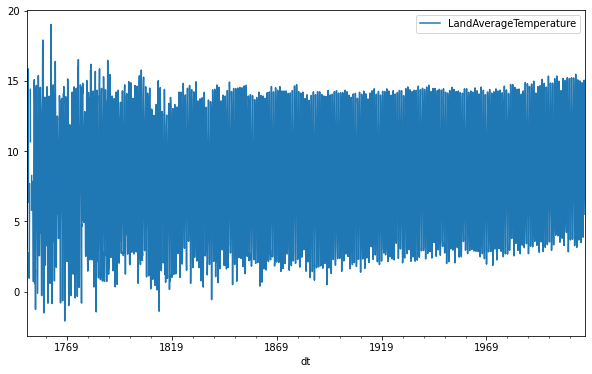

In [ ]:
global_temp_df_indexed[['LandAverageTemperature']].plot(figsize=(10,6))

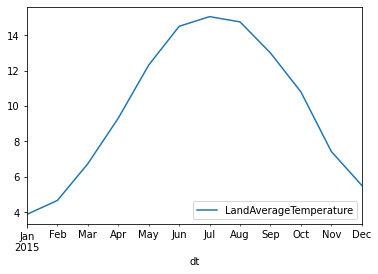

In [ ]:
sp_year = global_temp_df[global_temp_df['dt'].dt.year == 2015].set_index('dt')
sp_year[['LandAverageTemperature']].plot()

from your observations, what's the hottest month in 2015?

In [ ]:
years = global_temp_df['dt'].dt.year.unique()

In [ ]:
mean_temp_world = []

for year in years:
    mean_temp_world.append(global_temp_df[global_temp_df['dt'].apply(
        lambda x: x.year) == year]['LandAverageTemperature'].mean())

In [ ]:
d = {'Year': years, 'Land Avg. Temperature Per Year': mean_temp_world}

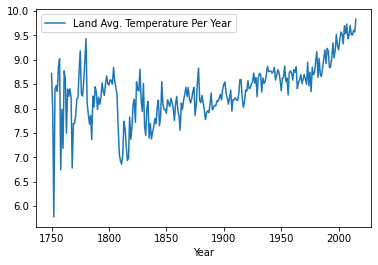

In [ ]:
pd.DataFrame(data=d).set_index('Year').plot()

Do you see a trend? what's it?

In [ ]:
temp_bycountry_df = pd.read_csv('./temperature-data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
temp_bycountry_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
temp_bycountry_df.info()

In [ ]:
temp_bycountry_df.isna().sum()

In [ ]:
temp_bycountry_df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
temp_bycountry_df

In [ ]:
max(temp_bycountry_df['dt'])

Timestamp('2013-09-01 00:00:00')

here, domain knowledge helped us in cleaning! 👍

In [ ]:
temp_bycountry_df = temp_bycountry_df[temp_bycountry_df['dt'].dt.year >= 1825]

In [ ]:
temp_bycountry_df['year'] = temp_bycountry_df['dt'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
temp_bycountry_df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
577457,2013-05-01,19.059,1.022,Zimbabwe,2013
577458,2013-06-01,17.613,0.473,Zimbabwe,2013
577459,2013-07-01,17.000,0.453,Zimbabwe,2013
577460,2013-08-01,19.759,0.717,Zimbabwe,2013
577461,2013-09-01,NaN,NaN,Zimbabwe,2013


for each country get the avg temp in the whole year.. so we need a group of country and year, right?

In [ ]:
grouping_country_by_year = temp_bycountry_df.groupby(by=['Country', 'year'])['AverageTemperature'].mean().reset_index()

In [ ]:
temp_bycountry_df.groupby(by=['Country', 'year'])['AverageTemperature'].mean()

Country      year
Afghanistan  1838    18.379571
             1839          NaN
             1840    13.413455
             1841    13.997600
             1842    15.154667
                       ...    
Åland        2009     6.489083
             2010     4.861917
             2011     7.170750
             2012     6.063917
             2013     6.229750
Name: AverageTemperature, Length: 42691, dtype: float64

In [ ]:
grouping_country_by_year

,Country,year,AverageTemperature
0,Afghanistan,1838,18.379571
1,Afghanistan,1839,NaN
2,Afghanistan,1840,13.413455
3,Afghanistan,1841,13.997600
4,Afghanistan,1842,15.154667
...,...,...,...
42686,Åland,2009,6.489083
42687,Åland,2010,4.861917
42688,Åland,2011,7.170750
42689,Åland,2012,6.063917


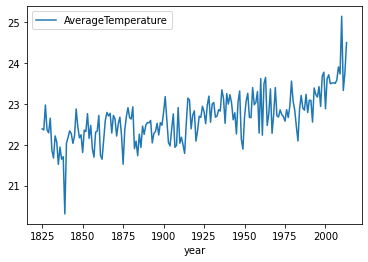

In [ ]:
grouping_country_by_year[grouping_country_by_year['Country']=='Egypt'].set_index('year')[['AverageTemperature']].plot()

In [ ]:
codes = pd.read_csv('./temperature-data/mapping.csv')
codes

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [ ]:
codes.loc[codes.name=='Åland Islands', 'name'] = 'Åland'

In [ ]:
codes

In [ ]:
codes['Country'] = codes['name']

In [ ]:
len(codes['name'].unique())

Power of collecting data from different sources and integrate them! ⭐

In [ ]:
data = pd.merge(left = grouping_country_by_year, right = codes, on = 'Country', how = 'left')

In [ ]:
data.head()

In [ ]:
len(grouping_country_by_year['Country'].unique())

In [ ]:
map_df = data[data['year']==2013]
map_df

,Country,year,AverageTemperature,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
175,Afghanistan,2013,16.533625,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
339,Africa,2013,25.208750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,Albania,2013,14.993875,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
717,Algeria,2013,25.121500,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
864,American Samoa,2013,27.517250,American Samoa,AS,ASM,16.0,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42035,Western Sahara,2013,23.744250,Western Sahara,EH,ESH,732.0,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
42173,Yemen,2013,28.129750,Yemen,YE,YEM,887.0,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
42337,Zambia,2013,21.196000,Zambia,ZM,ZMB,894.0,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
42501,Zimbabwe,2013,20.710750,Zimbabwe,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [ ]:
import plotly.express as px

In [ ]:
fig = go.Figure(
    data=go.Choropleth(
    locations = map_df['alpha-3'],
    z = map_df['AverageTemperature'],
    text = map_df['Country'],
    colorscale = ('#A93226', '#E67E22', '#F5B041', '#3498DB', '#2874A6', '#283747'),
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '°C',
    colorbar_title = 'AverageTemperature',
)
    )

fig.update_layout(
    title_text='2013 AverageTemperature',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '2013 Earth AverageTemperature',
        showarrow = False
    )]
)

fig.show()

In [ ]:
data

dropna is another way of cleaning missing values.

In [ ]:
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()

In [ ]:
countries.head()

In [ ]:
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

In [ ]:
difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']


In [ ]:
fig = go.Figure()
fig.update_layout(
                  title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 3500, width = 750)

fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

Africa, despite its low contribution to greenhouse gas emissions, remains the most vulnerable continent. Africa is the most vulnerable continent to climate change impacts under all climate scenarios above 1.5 degrees Celsius.
<br>
resource: https://www.afdb.org/en/cop25/climate-change-africa 